# TP images: corrélation et recherche de motif
## Données numériques - 2022-23
### Diane Lingrand (Diane.Lingrand@univ-cotedazur.fr)

In [45]:
from skimage import io
from skimage import data
from skimage import transform
from skimage.color import rgb2gray
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Circle
import math
import matplotlib.patches as patches

In [2]:
%matplotlib inline

## Cross Correlation

In [3]:
#voici les imagettes utilisées dans les slides
imageTest = np.array([[4,5,6,7,8],[4,5,8,9,10],[40,50,80,90,100],[43,48,88,92,5]])
motifTest = np.array([[4,5,6],[4,5,8],[40,50,80]])

[[  4   5   6   7   8]
 [  4   5   8   9  10]
 [ 40  50  80  90 100]
 [ 43  48  88  92   5]]
[[ 4  5  6]
 [ 4  5  8]
 [40 50 80]]


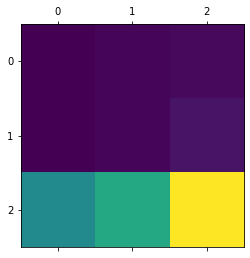

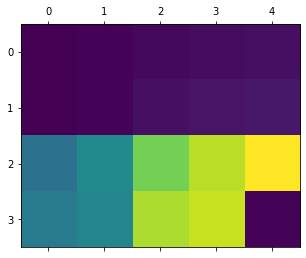

In [4]:
print(imageTest)
print(motifTest)
plt.matshow(motifTest)
plt.matshow(imageTest)


**Code from lessons**


In [5]:
def crossCorrelationWithoutNormNOPTFP(im, mo):
    hmo, wmo = mo.shape[:2]
    hmo2, wmo2 = hmo//2, wmo//2 # assuming mo of odd width and height
    him, wim = im.shape[:2]
    res = np.zeros(im.shape)
    mo = mo-np.mean(mo)
    stdMo = math.sqrt(np.mean(mo*mo))
    if stdMo == 0:
        return res
    mo /= stdMo
    for j in range(wmo2, wim-wmo2):
        for i in range(hmo2, him-hmo2):
            #mean of roi
            meanRoi = 0
            for l in range(wmo):
                for k in range(hmo):
                    meanRoi += im[i+k-hmo2][j+l-wmo2]
            meanRoi /= hmo*wmo
            # standard dev of roi
            stdRoi = 0
            for l in range(wmo):
                for k in range(hmo):
                    stdRoi += (im[i+k-hmo2][j+l-wmo2]-meanRoi)**2
            stdRoi = math.sqrt(stdRoi/hmo/wmo)
            if stdRoi == 0:
                res[i][j] = 0
                #cross correlation
            else:
                for l in range(wmo):
                    for k in range(hmo):
                        res[i][j] += (im[i+k-hmo2][j+l-wmo2]-meanRoi)*mo[k][l]
                res[i][j] /= stdRoi
    res /= hmo*wmo
    return res

In [6]:
def crossCorrelationWithoutNormNOPT(image, motif):
    heightMotif, widthtMotif = motif.shape[:2]
    heightMotifDiv2, widthtMotifDiv2 = heightMotif//2, widthtMotif//2 # assuming mo of odd width and height
    heightImage, widthImage = image.shape[:2]
    newOne = np.zeros(image.shape)
    motif = motif-np.mean(mo)
    ecartTypeMotif = math.sqrt(np.mean(motif*motif)) #chaque nombre est mis au carré
    if ecartTypeMotif == 0:
        return newOne
    motif /= ecartTypeMotif
    for j in range(widthtMotifDiv2, widthImage-widthtMotifDiv2):
        for i in range(heightMotifDiv2, heightImage-heightMotifDiv2):
            #mean of roi
            meanRoi = 0
            for l in range(widthtMotif):
                for k in range(heightMotif):
                    meanRoi += image[i+k-heightMotifDiv2][j+l-widthtMotifDiv2]
            meanRoi /= heightMotif*widthtMotif
            # standard dev of roi
            stdRoi = 0
            for l in range(widthtMotif):
                for k in range(heightMotif):
                    stdRoi += (image[i+k-heightMotifDiv2][j+l-widthtMotifDiv2]-meanRoi)**2
            stdRoi = math.sqrt(stdRoi/heightMotif/widthtMotif)
            if stdRoi == 0:
                newOne[i][j] = 0
                #cross correlation
            else:
                for l in range(widthtMotif):
                    for k in range(heightMotif):
                        newOne[i][j] += (image[i+k-heightMotifDiv2][j+l-widthtMotifDiv2]-meanRoi)*motif[k][l]
                newOne[i][j] /= stdRoi
    newOne /= heightMotif*widthtMotif
    return newOne



**Question 1:** Ecrire le code de la fonction *correlationWithoutNorm* qui prend en entrée 2 tableaux 2d de valeurs: une image (en niveau de gris) et un motif et retourne l'image de correlation sans aucune normalisation.

In [7]:
def crossCorrelationWithoutNorm(image, motif):
    heightMotif, widthtMotif = motif.shape[:2]
    heightMotifDiv2, widthtMotifDiv2 = heightMotif//2, widthtMotif//2 # assuming mo of odd width and height
    heightImage, widthImage = image.shape[:2]
    newOne = np.zeros(image.shape)
    for j in range(widthtMotifDiv2, widthImage-widthtMotifDiv2):
        for i in range(heightMotifDiv2, heightImage-heightMotifDiv2):
                for l in range(widthtMotif):
                    for k in range(heightMotif):
                        newOne[i][j] += (image[i+k-heightMotifDiv2][j+l-widthtMotifDiv2])*motif[k][l]
    return newOne

In [8]:
def crossCorrelationWithoutNorm_Opti(image, motif):
    heightMotif, widthtMotif = motif.shape[:2]
    heightMotifDiv2, widthtMotifDiv2 = heightMotif//2, widthtMotif//2 # assuming mo of odd width and height
    heightImage, widthImage = image.shape[:2]
    newOne = np.zeros(image.shape)
    for j in range(widthtMotifDiv2, widthImage-widthtMotifDiv2):
        for i in range(heightMotifDiv2, heightImage-heightMotifDiv2):
                heightIndexMin = i-heightMotifDiv2
                heightIndexMax = i+heightMotif-heightMotifDiv2
                widthIndexMin = j-widthtMotifDiv2
                widthIndexMax = j+widthtMotif-widthtMotifDiv2
                subImage = image[heightIndexMin:heightIndexMax ,widthIndexMin:widthIndexMax]

                subImage = subImage * motif
                newOne[i][j] = np.sum(subImage)
    return newOne

[[    0.     0.     0.     0.     0.]
 [    0. 10682. 13424. 15964.     0.]
 [    0. 12299. 15114. 10227.     0.]
 [    0.     0.     0.     0.     0.]]
[[    0.     0.     0.     0.     0.]
 [    0. 10682. 13424. 15964.     0.]
 [    0. 12299. 15114. 10227.     0.]
 [    0.     0.     0.     0.     0.]]
e


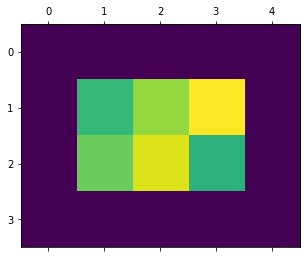

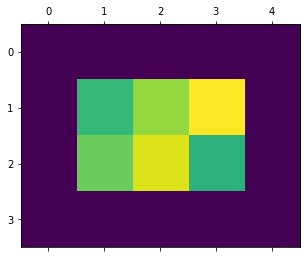

In [28]:
def test_CrossCorrelationWithoutNorm(imageTest,motifTest) :
   
    print(crossCorrelationWithoutNorm(imageTest,motifTest))
    plt.matshow(crossCorrelationWithoutNorm(imageTest,motifTest))
    
    print(crossCorrelationWithoutNorm_Opti(imageTest,motifTest))
    plt.matshow(crossCorrelationWithoutNorm_Opti(imageTest,motifTest))
    print('e')
test_CrossCorrelationWithoutNorm(imageTest,motifTest)

**Question 2:** Ecrire le code de la fonction *correlation* qui prend en entrée 2 tableaux 2d de valeurs: une image (en niveau de gris) et un motif et retourne l'image de correlation avec les normalisations vues en cours. Il pourra s'agir d'une implémentation naïve.

In [11]:
def crossCorrelation(image, motif):
    heightMotif, widthtMotif = motif.shape[:2]
    heightMotifDiv2, widthtMotifDiv2 = heightMotif//2, widthtMotif//2 # assuming mo of odd width and height
    heightImage, widthImage = image.shape[:2]
    newOne = np.zeros(image.shape)
    motif = motif-np.mean(motif)
    ecartTypeMotif = math.sqrt(np.mean(motif*motif)) #chaque nombre est mis au carré
    if ecartTypeMotif == 0:
        return newOne
    motif /= ecartTypeMotif
    for j in range(widthtMotifDiv2, widthImage-widthtMotifDiv2):
        for i in range(heightMotifDiv2, heightImage-heightMotifDiv2):
            
            heightIndexMin = i-heightMotifDiv2
            heightIndexMax = i+heightMotif-heightMotifDiv2
            widthIndexMin = j-widthtMotifDiv2
            widthIndexMax = j+widthtMotif-widthtMotifDiv2

            meanRoi = np.mean(image[heightIndexMin:heightIndexMax,widthIndexMin:widthIndexMax])
            stdRoi = np.std(image[heightIndexMin:heightIndexMax,widthIndexMin:widthIndexMax])
            
            if stdRoi == 0:
                newOne[i][j] = 0
                #cross correlation
                
            else:
                subImage = image[heightIndexMin:heightIndexMax ,widthIndexMin:widthIndexMax] - meanRoi
                subImage = subImage * motif
                newOne[i][j] = np.sum(subImage)
                newOne[i][j] /= stdRoi
    newOne /= heightMotif*widthtMotif
    return newOne


**Question 3:** Tester la fonction précédente. Affichez les résultats. Améliorer éventuellement l'implémentation pour accélerer les calculs. Il sera possible et peut-être nécessaire de revenir à cette question plus tard (question 5).

[[ 0.          0.          0.          0.          0.        ]
 [ 0.          1.          0.97916391  0.96322644  0.        ]
 [ 0.          0.59679602  0.55167288 -0.06123023  0.        ]
 [ 0.          0.          0.          0.          0.        ]]


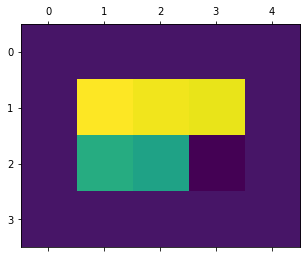

In [12]:
def test_CrossCorrelation() :
   
    print(crossCorrelation(imageTest,motifTest))
    plt.matshow(crossCorrelation(imageTest,motifTest))

test_CrossCorrelation()

## logo dans image

**Question 4:** Choisissez une image qui comporte plusieurs instances d'un motif et conservez l'image et une copie du motif. Modifiez la cellule suivante en conséquence. Soit les images sont en niveaux de gris, soit il faudra les convertir.

In [35]:
#img = io.imread('/home/lingrand/Ens/donneesNum/Cours10-corr/text.png')
#logo = io.imread('/home/lingrand/Ens/donneesNum/Cours10-corr/letter-a.png')
img = io.imread('./plaqadmissions.jpg')
logo = io.imread('./plaqadmissionsCopie2.jpg')


In [36]:
# conversion en niveaux de gris
img = rgb2gray(img[:,:,0:3])
logo = rgb2gray(logo[:,:,0:3])

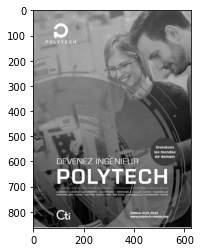

In [37]:
plt.imshow(img, cmap=plt.cm.gray)

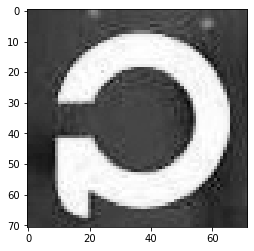

In [38]:
plt.imshow(logo, cmap=plt.cm.gray)

**Question 5:** Calculez la carte de corrélation et affichez la selon une carte de couleurs chaudes. Si les calculs sont trop longs, revenir à la question 3.

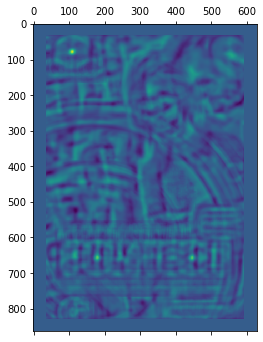

In [41]:
heatmap = crossCorrelation(img,logo)
plt.matshow(heatmap)


**Question 6:** Quel est le max? Où est-il situé?

In [42]:
print(np.max(heatmap))

0.9979403017997968


**Question 7:** Où sont les valeurs de forte corrélation? Il faut déterminer un seuil: 0.5? 0.8? 0.9? Ensuite, différentes possibilités de visualisation sont possibles:
- afficher la carte de corrélation seuillée en transparence sur l'image originale ou bien 
- entourer les zones concernées sur la carte de corrélation ou encore 
- sur l'image originale.

**Créer un ax et une fig afin de pouvoir faire un patch par dessus**

In [78]:
fig, ax = plt.subplots()
ax.matshow(heatmap)
h,w = heatmap.shape[:2]
seuil = np.max(heatmap)-1
for i in range(h):
    for j in range(w):
        if(heatmap[i][j] > seuil):
            c = patches.Circle((i,j), color = 'yellow', radius = 14, linewidth = 0.05, fill = False)
            ax.add_patch(c)
plt.show()


KeyboardInterrupt: 